# CS Practical 7

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download()
import string
from tqdm import tqdm
import zipfile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC as SVM


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


## 0. Import data

In [2]:
# Open zip file
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# Read data
df = pd.read_csv("data/IMDBDataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 1. EDA

In [4]:
# Convert sentiment to dummies
df = pd.get_dummies(df, columns=['sentiment']).drop(columns=['sentiment_negative']).rename(columns={'sentiment_positive': 'sentiment'})
df.head(5)



,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
# Check for class-imbalance
df.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

Text(0.5, 0, 'Length')

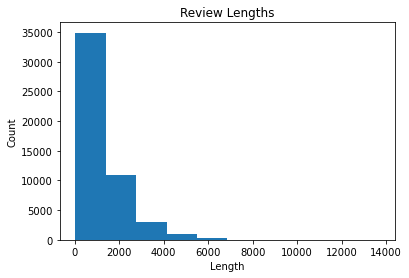

In [6]:
lengths = np.array(list(map(len, df.review)))
fig, ax = plt.subplots()

n, bins, patches = ax.hist(lengths)
ax.set_title("Review Lengths")
ax.set_ylabel("Count")
ax.set_xlabel("Length")

## 2. Preprocessing

In [7]:
stop_words = stopwords.words("english")
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess(text, lemmatize=False):
    # remove line break symbol
    text = text.replace("<br />", "")
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # tokenize
    words = word_tokenize(text)
    # remove stopwords
    words = [word for word in words if word not in stop_words]
    
    if not lemmatize:
        # stem words
        stemmed_words = [porter.stem(word) for word in words] 
    else:
        # lemmatize words
        stemmed_words = [lemmatizer.lemmatize(word) for word in words]
    
    stemmed_words = " ".join(stemmed_words)
    
    return stemmed_words
    
    
    

In [8]:
processed_text = []
for text in tqdm(df.review, "Pre-processing"):
    processed_text.append(preprocess(text)) 

Pre-processing: 100%|██████████| 50000/50000 [04:25<00:00, 188.09it/s]


## 3. Vectorization

In [9]:
processed_text = np.array(processed_text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_text)
y = np.array(df.sentiment)

## 4. Build Classifier

#### Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [11]:
LR_fit = LogisticRegression(random_state=0).fit(X_train, y_train)

In [12]:
LR_pred = LR_fit.predict(X_test)

In [13]:
print("Logistic Regression Accuracy: {}%".format(round(LR_fit.score(X_test, y_test)*100, 3)))

Logistic Regression Accuracy: 88.993%


In [14]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7550
           1       0.88      0.90      0.89      7450

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



#### Support Vector Machine

In [15]:
SVM_fit = SVM().fit(X_train, y_train)

In [16]:
SVM_pred = SVM_fit.predict(X_test)

In [17]:
print("SVM Regression Accuracy: {}%".format(round(SVM_fit.score(X_test, y_test)*100, 3)))

SVM Regression Accuracy: 89.313%


In [18]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7550
           1       0.89      0.90      0.89      7450

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

